In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.metrics import accuracy_score
from PIL import Image

from price_recognition import PriceRecognizer

In [2]:
# Директория, в которой содержатся изображения цен
MAIN_DIR = "./imgs"

В качестве алгоритма была выбрана предобученная модель [TrOCR](https://huggingface.co/docs/transformers/model_doc/trocr), потому что она основана на трансформерах и показывает высокую точность при распознавании текста на изображениях. Модели Tesseract и EasyOCR основны на рекуррентных и сверточных нейронных сетях и не показывают столь же высокого качества.

![Архитектура TrOCR](trocr.png)

В [бенчмарках](https://paperswithcode.com/paper/trocr-transformer-based-optical-character/review/) можно увидеть, что модели семейства TrOCR демонстрируют гораздо более высокое качество, чем CRNN и TesseractOCR.

![Бенчмарки](benchmarks.png)

In [ ]:
# Объекта класса PriceRecognizer для распознавания цен
price_recognizer = PriceRecognizer()

# Проверка качества модели на контрольной выборке

In [4]:
val_data = pd.read_csv('val.csv')
val_data.head()

,img_name,text
0,508763287_2.jpg,105.0
1,508811724_2.jpg,33.0
2,508757581_2.jpg,23.0
3,509323355_2.jpg,79.0
4,483319419_2.jpg,95.0


In [5]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   img_name  1000 non-null   object 
 1   text      1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [6]:
val_predictions = []
val_true_values = []

In [7]:
for _, row in val_data.iterrows():
    img_path = row['img_name']
    true_price = int(row['text'])
    predicted_price = price_recognizer.predict(os.path.join(MAIN_DIR, img_path))
    
    val_predictions.append(predicted_price)
    val_true_values.append(true_price)

In [8]:
accuracy = accuracy_score(val_true_values, val_predictions)
print(f'Точность на контрольной выборке: {accuracy * 100}%')

Точность на контрольной выборке: 97.7%


# Получение результатов на тестовой выборке

In [9]:
test_data = pd.read_csv('test.csv')
test_data.head()

,img_name
0,511228291_2.jpg
1,510883758_2.jpg
2,509390607_2.jpg
3,508764417_2.jpg
4,510880074_2.jpg


In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_name  238 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [11]:
test_predictions = []

In [12]:
for img_name in test_data['img_name']:
    predicted_price = price_recognizer.predict(os.path.join(MAIN_DIR, img_name))
    test_predictions.append(predicted_price)

In [13]:
test_data['text'] = test_predictions
test_data.head()

,img_name,text
0,511228291_2.jpg,72
1,510883758_2.jpg,899
2,509390607_2.jpg,219
3,508764417_2.jpg,1039
4,510880074_2.jpg,199


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_name  238 non-null    object
 1   text      238 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [15]:
test_data.to_csv('test_predictions.csv', index=False)

# Визуализация результатов

In [16]:
sample_images = test_data.sample(5)
sample_images

,img_name,text
208,509323395_2.jpg,289
78,508754093_2.jpg,54
234,508783317_2.jpg,24
200,509211393_2.jpg,169
116,508763557_2.jpg,599


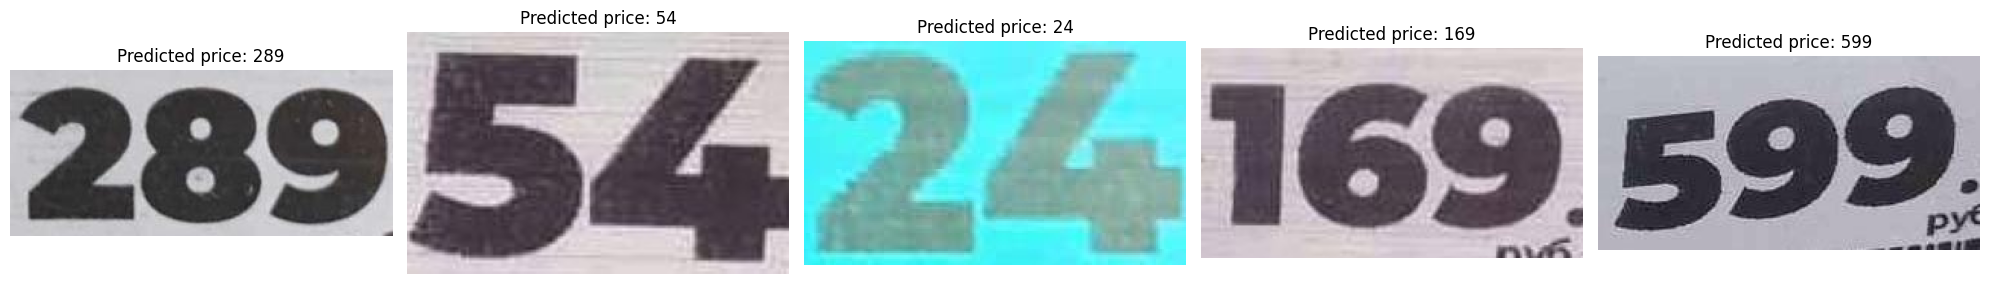

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = row['img_name']
    predicted_price = row['text']
    
    image = Image.open(os.path.join(MAIN_DIR, img_path))
    
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f'Predicted price: {predicted_price}', fontsize=12)
    
plt.tight_layout()
plt.show()